导入包

In [1]:
import matplotlib.pyplot as plt
# 显示中文设置字体
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
import numpy as np

激活函数sigmoid定义

In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

Text(0, 0.5, 'y(x)')

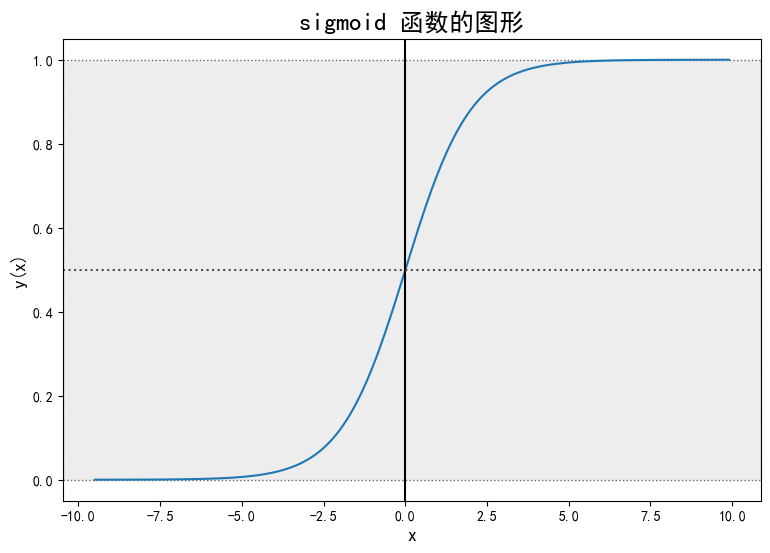

In [3]:
x = np.arange(-9.5, 10, 0.1)
y = sigmoid(x)
plt.figure(figsize=(9, 6))
plt.plot(x, y)
plt.axvline(0, c='black')
plt.axhspan(.0, 1.0, facecolor='0.93', alpha=1.0, ls=':', edgecolor='0.4')
plt.axhline(y=.5, color='.3',alpha=1.0, ls=':')
plt.title('sigmoid 函数的图形', fontsize=18)
plt.xlabel('x', fontsize=13)
plt.ylabel('y(x)', fontsize=13)


[logistics公式推理](https://juejin.cn/post/7057447537757650957#heading-7)

[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

[安德森鸢尾花卉数据集](https://zh.wikipedia.org/wiki/%E5%AE%89%E5%BE%B7%E6%A3%AE%E9%B8%A2%E5%B0%BE%E8%8A%B1%E5%8D%89%E6%95%B0%E6%8D%AE%E9%9B%86)

In [4]:
from sklearn import datasets

In [5]:
iris = datasets.load_iris()

In [6]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [7]:
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1

In [9]:
X[y==1][:5]

array([[7. , 3.2],
       [6.4, 3.2],
       [6.9, 3.1],
       [5.5, 2.3],
       [6.5, 2.8]])

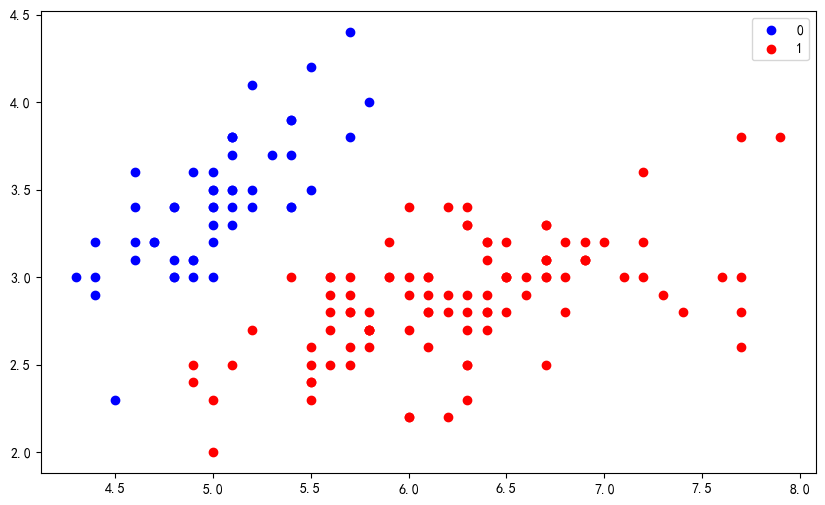

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

In [12]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [13]:
model = LogisticRegression(lr=0.1, num_iter=300000, verbose=True)

In [15]:
150*0.8

120.0

In [14]:
X_train.shape

(120, 2)

In [16]:
%time model.fit(X_train, y_train)

loss: 0.6180732804352942 	
loss: 0.03877822083083416 	
loss: 0.03254713428729503 	
loss: 0.028782222047876817 	
loss: 0.025876216083806806 	
loss: 0.02350344995019046 	
loss: 0.021532091048834957 	
loss: 0.019879106926908023 	
loss: 0.018481450020735465 	
loss: 0.017289110897856556 	
loss: 0.016262450243806497 	
loss: 0.01537026630505436 	
loss: 0.014588079138120403 	
loss: 0.013896655086162604 	
loss: 0.013280807425964743 	
loss: 0.012728459129026619 	
loss: 0.012229926477032298 	
loss: 0.01177737693173528 	
loss: 0.011364419781056723 	
loss: 0.010985796254351522 	
loss: 0.010637143678861755 	
loss: 0.010314814742123897 	
loss: 0.01001573791418039 	
loss: 0.009737308789020521 	
loss: 0.009477304813271767 	
loss: 0.009233817837937827 	
loss: 0.009005200358001675 	
loss: 0.00879002234558541 	
loss: 0.008587036344302513 	
loss: 0.008395149053635273 	
CPU times: user 6.33 s, sys: 0 ns, total: 6.33 s
Wall time: 6.27 s


In [17]:
preds = model.predict(X_test)
print(preds[:10])
(preds == y_test).mean()

[1. 1. 1. 0. 1. 0. 0. 0. 1. 1.]


1.0

In [18]:
model.theta

array([-27.64414023,  12.88028186, -13.4285233 ])

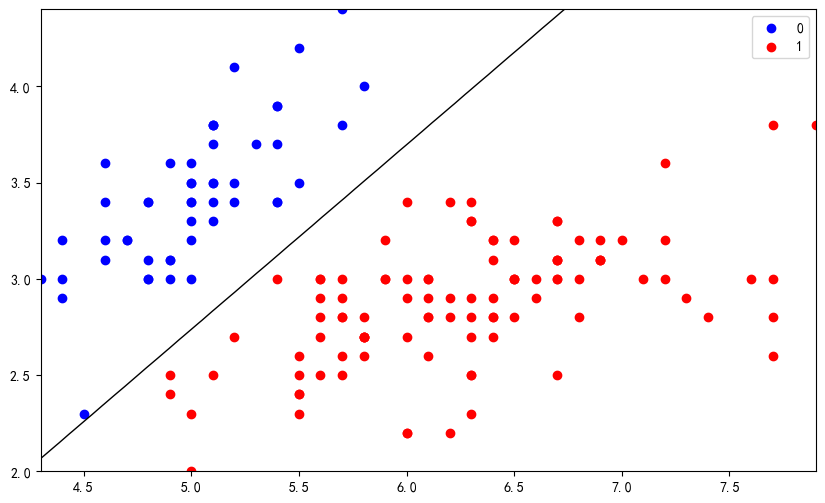

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression(C=1e20, max_iter=300000)

In [23]:
%time model.fit(X_train, y_train)

CPU times: user 13.4 ms, sys: 0 ns, total: 13.4 ms
Wall time: 41.4 ms


LogisticRegression(C=1e+20, max_iter=300000)

In [24]:
preds = model.predict(X_test)
(preds == y_test).mean()

1.0

In [25]:
model.intercept_, model.coef_

(array([-111.27391287]), array([[ 46.56403173, -44.71732909]]))

In [26]:
1/(1+np.exp(-4))

0.9820137900379085

In [27]:
1/(1+np.exp(2))

0.11920292202211755

In [28]:
0.98*2-0.12+0

1.8399999999999999

In [30]:
1/(1+np.exp(-1.83))

0.861761726827506